# Analysis of the house price in Seattle
Group Members: Chen Chen, Anqian Li, Yaqiong Liu

## Background information
After a while of findings, We decided to use this dataset contains house sale prices for King County. King County is a county located in the U.S. State of Washington. The population was 2,188,649 in the 2017 census estimate. King County is the most populous county in Washington, and the 13th most popular County in the United States. The county seat in Seattle. which is the state's largest city. We know that house prices are affected by many different factors, as the size of the house is not the only factor that has a significant influence. For example, a house with more bedrooms and bathrooms might have a higher price compared to the other houses in the same community. A house has a view of waterfront might cost much than the houses with similar size but no views of waterfront. We want to deeply investigate, which factors affect the house price in King County and especially how much influence they have. We would like to focus on the house price changes in Seattle. The data we choose includes houses sold between May 2014 and May 2015.

## Can obtain the data from  the below url:
https://www.kaggle.com/harlfoxem/housesalesprediction

## A. A discussion of each of the variables included in the dataset, and what the observational unit is: 

- Variables:

Numerical:
    - Id: This is a unique identifier for each house.
    - Date: This variable indicates the date when the house was sold.
    - Price: This is the price of the house when it was sold.
    - Bedrooms: This variable is the number of bedrooms per house.
    - Bathrooms: This variable is obtained by the number of bathrooms / the total number of rooms of the house.
    - Sqft_living: This is the total square footage of the home.
    - Sqft_lot: This is the total square footage of the lot.
    - Floors: Total floors (levels) in-house.
    - View: This is the number that the house has been viewed.
    - Condition: How good the overall condition of the house is. This range from 1 to 5.
    - Grade: overall grade given to the housing unit, based on the King County grading system. Range from 1 to 13. The specific King County grading system can be found at: 
    https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r
    
    - Sqft_above: square footage of house apart from the basement.
    - Sqft_basement: square footage of the basement.
    - Yr_built: The year when the house was originally built.
    - Yr_renovated: Year when the house was renovated. If there is no innovation, then the value of this variable is 0. 
    - Lat: Latitude coordinate of the house.
    - Long: Longitude coordinate of the house.
    - Sqft_living15: Living room area in 2015 (implies -- some renovations). This might or might not have affected the lot size area.
    - Sqft_lot15lot: Size area in 2015(implies-- some renovations).

Categorical:
    - Waterfront: House which has a view to a waterfront. 0 indicates that the house does not have a view of a waterfront; 1 indicates that the house has a view of a waterfront.
    - Zipcode: the zip code of where the house is.
    - What the observation unit is:                                  

- Each row is an observational unit, One row for each transaction history. 

## B. Discussion of how the data is collected:
- This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. 

## C. “Common knowledge”:
- The average house price in Seattle in 2015 is 733,400.
- The most important considerations people have when buying a house are the location (eg: the view of the house); neighborhood (eg: whether it is near a good academic institution or not) and the size of the house.

## D. A review of other house price in research or studies that have been done.:

- https://www.redfin.com/blog/data-center

##  Exploratory Analysis of the Data

In [1]:
import numpy as np
import pandas as pd

## 1. Summary statistics and the distributional shape of variables in the data

In [2]:
house = pd.read_csv('kc_house_data.csv')

In [3]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# get rid of the duplicated id
house = house[~house.id.duplicated()]

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21436 entries, 0 to 21612
Data columns (total 21 columns):
id               21436 non-null int64
date             21436 non-null object
price            21436 non-null float64
bedrooms         21436 non-null int64
bathrooms        21436 non-null float64
sqft_living      21436 non-null int64
sqft_lot         21436 non-null int64
floors           21436 non-null float64
waterfront       21436 non-null int64
view             21436 non-null int64
condition        21436 non-null int64
grade            21436 non-null int64
sqft_above       21436 non-null int64
sqft_basement    21436 non-null int64
yr_built         21436 non-null int64
yr_renovated     21436 non-null int64
zipcode          21436 non-null int64
lat              21436 non-null float64
long             21436 non-null float64
sqft_living15    21436 non-null int64
sqft_lot15       21436 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.6+ MB


In [6]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.143600e+04,2.143600e+04,21436.000000,21436.000000,21436.000000,2.143600e+04,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000
mean,4.580765e+09,5.405293e+05,3.371571,2.117349,2082.704936,1.513564e+04,1.496198,0.007604,0.235118,3.410384,7.661737,1790.960440,291.744495,1971.098433,84.729800,98077.862288,47.560156,-122.213697,1988.314378,12785.961280
std,2.876590e+09,3.676893e+05,0.929205,0.769913,919.146469,4.153862e+04,0.540388,0.086871,0.767092,0.650235,1.174256,829.026491,442.781983,29.385277,402.431012,53.469371,0.138601,0.140896,685.699093,27375.467469
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123700e+09,3.221500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.230000,1840.000000,7620.000000
75%,7.308675e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069625e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98117.000000,47.678000,-122.124000,2370.000000,10087.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

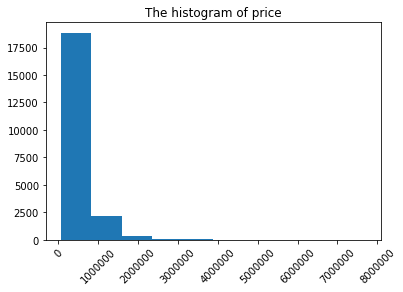

In [8]:
plt.hist(house.price) 
plt.title('The histogram of price')
plt.xticks(rotation=45)
plt.show()

the histogram of price looks pretty right-skewed, so we decided to cut out the 3% outliers of prices

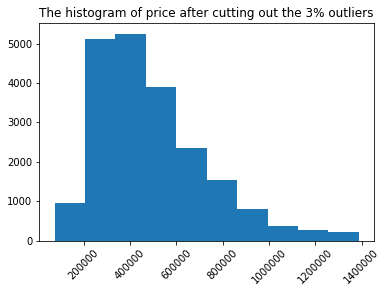

In [9]:
house1 = house.sort_values(by='price').iloc[0:int(21436*(1-0.03)),]
plt.hist(house1.price)
plt.title('The histogram of price after cutting out the 3% outliers')
plt.xticks(rotation=45)
plt.show()

We only look at the areas in Seattle

In [10]:
house1 = house1.loc[house1['zipcode'].astype(str).str[0:3] == '981',]
house1.shape

(8659, 21)

The distributional shape of variables in the data

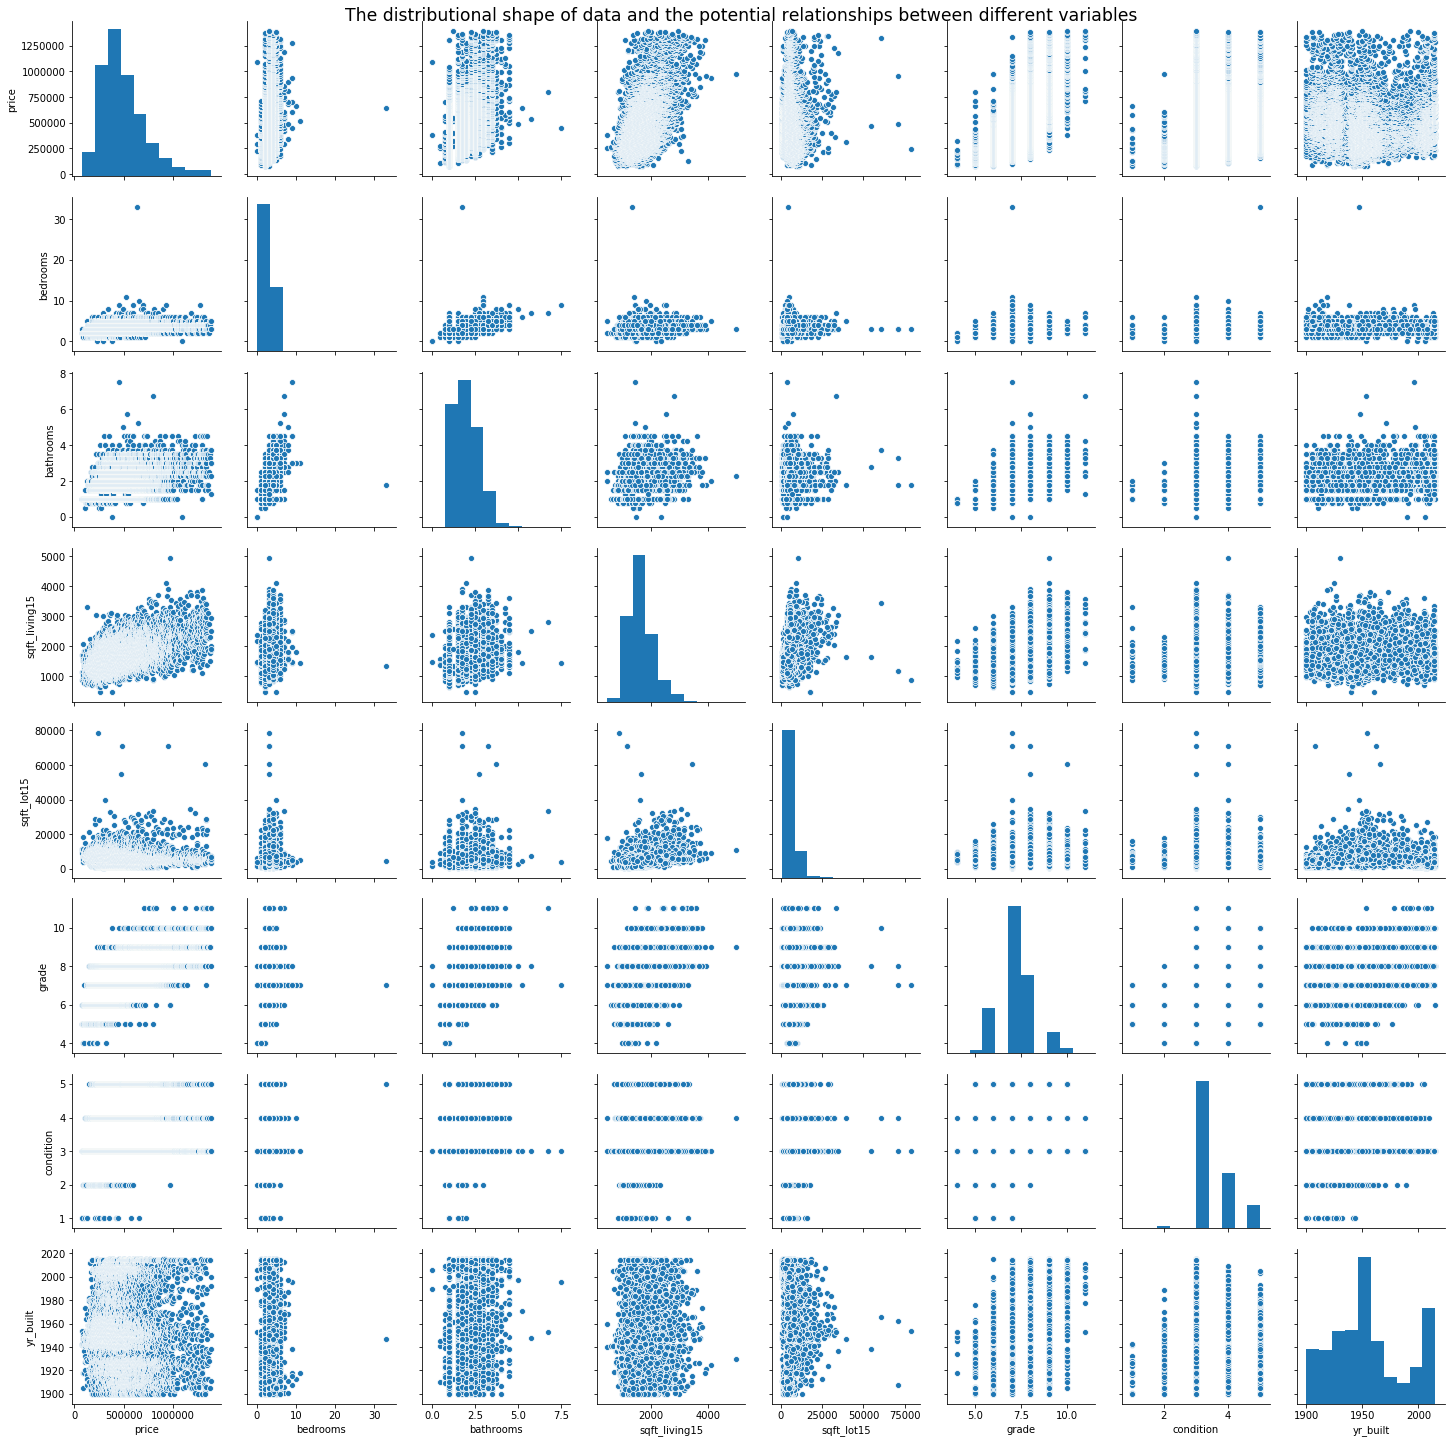

In [11]:
temp = house1[['price','bedrooms','bathrooms','sqft_living15','sqft_lot15','grade','condition','yr_built']]
sns.pairplot(temp)
plt.suptitle('The distributional shape of data and the potential relationships between different variables ', 
             y = 1, fontsize = 'xx-large')
plt.show()

### Guiding question 1: What is the relationship between price and house location?

In [12]:
house1.zipcode = house1.zipcode.astype('category')

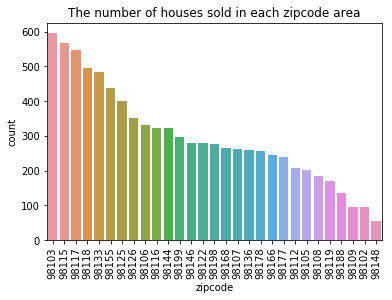

In [13]:
sns.countplot(x='zipcode',data=house1,order = house1['zipcode'].value_counts().index)
plt.xticks(rotation=90)
plt.title('The number of houses sold in each zipcode area')
plt.show()

In [14]:
house1.groupby(['zipcode']).price.mean()

zipcode
98102    729486.148936
98103    577921.753356
98105    731586.098522
98106    318960.687879
98107    562859.576336
98108    355871.372973
98109    752567.447917
98112    829459.000000
98115    602629.663139
98116    600344.848297
98117    575643.410584
98118    403178.777328
98119    748140.857988
98122    600144.471429
98125    458589.915000
98126    424377.982955
98133    385523.224742
98136    534642.773077
98144    522501.065015
98146    357167.760714
98148    282049.821429
98155    400675.423341
98166    435234.232653
98168    241330.803030
98177    592149.686192
98178    305216.505837
98188    289327.074074
98198    302925.952727
98199    719973.723906
Name: price, dtype: float64

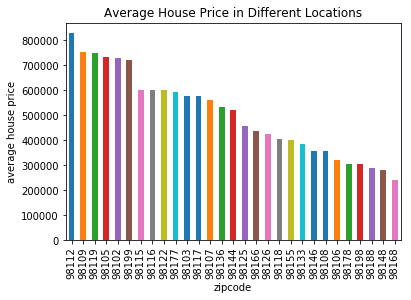

In [15]:
mean_loc=house1.groupby('zipcode').price.mean()
mean_loc1=mean_loc.sort_values(ascending=False)
mean_loc1.plot(kind="bar")
plt.ylabel("average house price")
plt.title("Average House Price in Different Locations")
plt.show()

#### ANOVA for zipcode and price

In [16]:
model = smf.ols(formula='price ~ zipcode', data=house1)
results = model.fit()
print(sm.stats.anova_lm(results))

              df        sum_sq       mean_sq           F  PR(>F)
zipcode     28.0  1.776488e+14  6.344599e+12  189.726364     0.0
Residual  8630.0  2.885940e+14  3.344079e+10         NaN     NaN


#### ANOVA for waterfront and price

In [17]:
model = smf.ols(formula='price ~ waterfront', data=house1)
results = model.fit()
print(sm.stats.anova_lm(results))

                df        sum_sq       mean_sq           F        PR(>F)
waterfront     1.0  7.110322e+12  7.110322e+12  134.065999  8.901912e-31
Residual    8657.0  4.591325e+14  5.303598e+10         NaN           NaN


### Guiding question 2: What is the relationship between price and the size of the hosue?

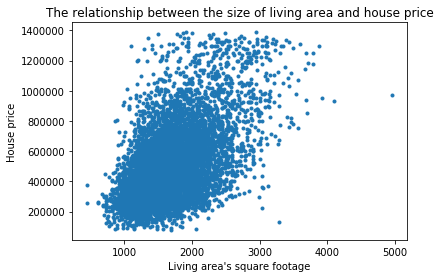

In [18]:
plt.scatter(house1.sqft_living15, house1.price, marker='.')
plt.title('The relationship between the size of living area and house price')
plt.xlabel("Living area's square footage")
plt.ylabel('House price')
plt.show()

The correlation coefficient of hosue living area and price.

In [19]:
np.corrcoef(house1.price,house1.sqft_living15)

array([[1.        , 0.53974874],
       [0.53974874, 1.        ]])

## Data Modeling
- We chose price as our response variable, and based on the correlation plot, we have eliminated some of the variables. We decide to use zipcode, living area, condition, waterfront, number of bedrooms and bathrooms and the year built as our predictors.
- Then, we fit in a linear model to see which are the significant variables in predicting the house price.

In [67]:
#from sklearn import linear_model, preprocessing, model_selection

In [68]:
#X = house1.loc[:, ['zipcode', 'sqft_living15', 'condition', 'waterfront', 'bedrooms', 'bathrooms', 'yr_built']]
#y = house1.price

In [69]:
#housemodel = linear_model.LinearRegression(fit_intercept = True)

In [70]:
#cv = model_selection.ShuffleSplit(n_splits = 5, test_size=0.3, random_state = 0)
#cv_linear = model_selection.cross_val_score(housemodel, X, y, cv = cv)
#np.mean(cv_linear)

In [71]:
model = smf.ols(formula='price ~ zipcode + sqft_living15 + condition + waterfront + bedrooms + bathrooms + yr_built',
                data=house1)
results = model.fit()
print(sm.stats.anova_lm(results))

                   df        sum_sq       mean_sq            F         PR(>F)
zipcode          28.0  1.776488e+14  6.344599e+12   360.260609   0.000000e+00
sqft_living15     1.0  9.298866e+13  9.298866e+13  5280.104828   0.000000e+00
condition         1.0  5.135953e+12  5.135953e+12   291.630962   2.486518e-64
waterfront        1.0  7.197219e+12  7.197219e+12   408.674249   7.966427e-89
bedrooms          1.0  1.408805e+13  1.408805e+13   799.951374  2.251043e-168
bathrooms         1.0  1.522156e+13  1.522156e+13   864.314124  3.897175e-181
yr_built          1.0  2.084119e+12  2.084119e+12   118.340978   2.197987e-27
Residual       8624.0  1.518785e+14  1.761114e+10          NaN            NaN


### As we can see from the above ANOVA table, all of the predictors have a p-value near to 0. Hence, we say that all the predictors we chose are statistically significant in predicting house sales price.

In [48]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     525.0
Date:                Thu, 06 Dec 2018   Prob (F-statistic):               0.00
Time:                        15:42:12   Log-Likelihood:            -1.1441e+05
No. Observations:                8659   AIC:                         2.289e+05
Df Residuals:                    8624   BIC:                         2.291e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.278e+06   1.13e+05     11.292      0.000    1.06e+06     1.5e+06
zipcode[T.98103] -8.045e+04   1.48e+04     -5.442      0.000   -1.09e+05   -5.15e+04
zipcode[T.98105] -1.989e+04   1.66e+04     -1.200      0.230   -5.24e+04    1.26e+04
zipcode[T.98106] -2.882e+05   1.56e+04    -18.429      0.000   -3.19e+05   -2.58e+05
zipcode[T.98107] -9.739e+04    1.6e+04     -6.084      0.000   -1.29e+05    -6.6e+04
zipcode[T.98108] -3.093e+05   1.69e+04    -18.351      0.000   -3.42e+05   -2.76e+05
zipcode[T.98109]  2.615e+04   1.93e+04      1.357      0.175   -1.16e+04    6.39e+04
zipcode[T.98112]  6.151e+04   1.65e+04      3.724      0.000    2.91e+04    9.39e+04
zipcode[T.98115]  -8.25e+04   1.48e+04     -5.571      0.000   -1.12e+05   -5.35e+04
zipcode[T.98116] -8.968e+04   1.56e+04     -5.758      0.000    -1.2e+05   -5.91e+04
zipcode[T.98117] -8.083e+04   1.49e+04     -5.436      0.000    -1.1e+05   -5.17e+04
zipcode[T.98118] -2.561e+05    1.5e+04    -17.098      0.000   -2.85e+05   -2.27e+05
zipcode[T.98119]  2.582e+04   1.71e+04      1.512      0.131   -7664.034    5.93e+04
zipcode[T.98122]  -9.23e+04   1.58e+04     -5.830      0.000   -1.23e+05   -6.13e+04
zipcode[T.98125] -2.125e+05   1.53e+04    -13.924      0.000   -2.42e+05   -1.83e+05
zipcode[T.98126] -1.899e+05   1.55e+04    -12.253      0.000    -2.2e+05    -1.6e+05
zipcode[T.98133] -2.587e+05   1.51e+04    -17.181      0.000   -2.88e+05   -2.29e+05
zipcode[T.98136]   -1.4e+05    1.6e+04     -8.752      0.000   -1.71e+05   -1.09e+05
zipcode[T.98144] -1.697e+05   1.56e+04    -10.891      0.000      -2e+05   -1.39e+05
zipcode[T.98146] -2.846e+05   1.59e+04    -17.894      0.000   -3.16e+05   -2.53e+05
zipcode[T.98148] -3.676e+05   2.24e+04    -16.380      0.000   -4.12e+05   -3.24e+05
zipcode[T.98155] -2.797e+05   1.52e+04    -18.454      0.000   -3.09e+05    -2.5e+05
zipcode[T.98166] -3.053e+05   1.62e+04    -18.876      0.000   -3.37e+05   -2.74e+05
zipcode[T.98168]  -3.62e+05    1.6e+04    -22.560      0.000   -3.93e+05   -3.31e+05
zipcode[T.98177] -1.818e+05   1.62e+04    -11.209      0.000   -2.14e+05    -1.5e+05
zipcode[T.98178]  -3.71e+05   1.61e+04    -23.091      0.000   -4.03e+05    -3.4e+05
zipcode[T.98188] -3.803e+05   1.79e+04    -21.252      0.000   -4.15e+05   -3.45e+05
zipcode[T.98198] -3.868e+05    1.6e+04    -24.241      0.000   -4.18e+05   -3.55e+05
zipcode[T.98199] -2.585e+04   1.57e+04     -1.644      0.100   -5.67e+04    4966.834
sqft_living15      179.8853      3.725     48.290      0.000     172.583     187.187
condition         2.757e+04   2228.809     12.371      0.000    2.32e+04    3.19e+04
waterfront        3.986e+05      2e+04     19.959      0.000    3.59e+05    4.38e+05
bedrooms          1.751e+04   1658.770     10.557      0.000    1.43e+04    2.08e+04
bathrooms         8.175

#### For zipcode, we have 29 different levels, python makes 98102 as the base, and creates 28 coefficients by comparing the other 28 zipcodes with zipcode 90102.
    -	On average, houses located in zipcode 98103 was sold 80450 points lower on house price compared with house sales price in zipcode 98102. This difference is statistically significant. 
    
    -	On average, people who has a high attitude toward discrimination of females score 8.733 points lower on their attitude toward female leadership. This difference is statistically significant (p = 0.0177). 

- As the sqft_living15 increases one unit, on average, the price of the house will increase 179.8853; 
- As the condition increases one unit, on average, the price of the house will increase 179.8853; 
- As the sqft_living15 increases one unit, on average, the price of the house will increase 2.757e+04; 
- As the waterfront increases one unit, on average, the price of the house will increase 3.986e+05; 
- As the bedrooms increases one unit, on average, the price of the house will increase 17510 units; 
- As the yr_built increases one unit, on average, the price of the house will decrease 614.3709 units.

###### We get a R-square of approcimately 0.673, which means that 67.3% of the variance in house sales prices can be explained by the zipcode of the house, the square footages of the house living area, the condition of the house, the view of waterfront, the number of bedrooms and bathrooms and the year when the house is built.